# Loading the datasets into Pandas

In [166]:
!git clone https://github.com/RamtinTJB/CSE151A-Project

Cloning into 'CSE151A-Project'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 22 (delta 3), reused 10 (delta 1), pack-reused 0
Receiving objects: 100% (22/22), 419.46 KiB | 1.31 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [167]:
import pandas as pd
import numpy as np

house_prices = pd.read_csv("CSE151A-Project/data/MedianPricesofExistingDetachedHomesHistoricalData.csv")

# Data Preprocessing

In [77]:
print(f'Shape of the DataFrame: {house_prices.shape}')
print(f'Number of observations: {house_prices.shape[0]}')
print(f'Last meaningful column: {house_prices.columns[62]}')

Shape of the DataFrame: (408, 111)
Number of observations: 408
Last meaningful column: SoCal


The last meaningful column in this dataset is labeled 'SoCal' which is column number 62. Everything else after that is garbage which we need to delete.

In [78]:
cols = house_prices.columns.tolist()
house_prices = house_prices.loc[:, ~house_prices.columns.isin(cols[63:])]
house_prices.drop("Unnamed: 54", axis=1, inplace=True)

print(f'New shape: {house_prices.shape}')

New shape: (408, 62)


This dataset contains 408 rows each row correspoding to a month from 1990-2023. Since $(2023-1990+1) * 12 = 408$, no month is missing from the dataset which is good.

In [80]:
print(house_prices["Mon-Yr"])

0      32874
1      32905
2      32933
3      32964
4      32994
       ...  
403    45142
404    45170
405    45200
406    45231
407    45261
Name: Mon-Yr, Length: 408, dtype: int64


As we can see in the output above, the "Mon-Yr" column is not formatted properly and contains numbers instead of actual dates. So we'll add a new column with Python's datetime objects so that we can plot our data as a time series. The dates are from Jan-1990 to Dec-2023 based on the original data.

In [89]:
from datetime import datetime

dates_arr = [""] * 408
for year_offset in range(34):
    for month in range(12):
        dates_arr[year_offset*12 + month] = datetime(year=1990+year_offset, month=month+1, day=1)

house_prices["Dates"] = dates_arr

Now that we added a new column for dates, we can drop the "Mon-Yr" column from the dataframe.

In [96]:
house_prices.drop("Mon-Yr", axis=1, inplace=True)

Our dataset contains the monthly housing prices for all the counties in California, for the sake of this project, we decided to only analyze 5 counties and run our models on those, but it can be applied to any of the other ones in the future if needed. The counties we chose are San Diego, Los Angeles, San Fransisco, Orange, and Tulare.

In [99]:
counties = ["San Diego", "Los Angeles", "San Francisco", "Orange", "Tulare"]

#### Plotting the prices

Now we'll plot the prices over the time frame that we have to see if we need to perform more data cleaning or if we can find any interesting patterns.

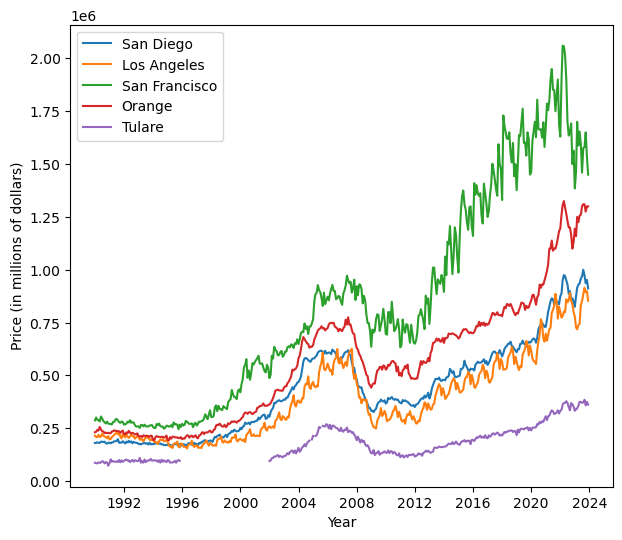

In [165]:
plt.rcParams["figure.figsize"] = (7,6)

from matplotlib import pyplot as plt

for county in counties:
    plt.plot(house_prices["Dates"], house_prices[county], label=county)

plt.xlabel("Year")
plt.ylabel("Price (in millions of dollars)")
plt.legend()
plt.show()

#### Observations based on the graph

One common pattern we can observe in all of the counties is the sharp price fall in around 2008 which can be attributed to the 2007-2008 financial crisis.

Another common pattern is the price peak in around 2021 which also coincided with the rise in COVID-19 pandemic.

Another thing we noticed in the graph is the absense of data in between 1996 and 2001 for the Tulare county. This is because the house pricing data for those years are unavailable for the Tulare county and are marked as NA in the dataset. So we need to take care of that as well.

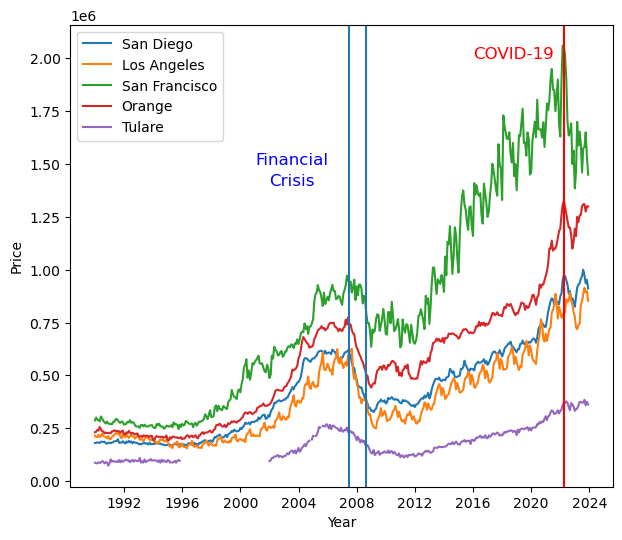

In [163]:
plt.rcParams["figure.figsize"] = (7,6)

for county in counties:
    plt.plot(house_prices["Dates"], house_prices[county], label=county)

plt.axvline(datetime(year=2007, month=7, day=1)) # August 2007
plt.axvline(datetime(year=2008, month=9, day=1)) # September 2008
plt.text(datetime(year=2001, month=1, day=1), 1.5e6, "Financial", size=12, c='b')
plt.text(datetime(year=2002, month=1, day=1), 1.4e6, "Crisis", size=12, c='b')

plt.axvline(datetime(year=2022, month=4, day=1), c='r')
plt.text(datetime(year=2016, month=1, day=1), 2e6, "COVID-19", size=12, c='r')

plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.show()

#### Analazying NAs

In [145]:
for county in counties:
    print(f'{county}: {house_prices[county].isna().sum()} NAs')

San Diego: 0 NAs
Los Angeles: 0 NAs
San Francisco: 0 NAs
Orange: 0 NAs
Tulare: 76 NAs


#### Separating each county to its own DataFrame

According to the output above, only Tulare county has NA rows. For the sake of convenience, we decided to separate each county into its own dataframe.

In [146]:
county_dfs = {}

for county in counties:
    county_dfs[county] = house_prices.filter(["Dates", county], axis=1)

Now we'll drop the rows in Tulare dataset that contains an NA

In [151]:
for county in counties:
    county_dfs[county] = county_dfs[county].dropna()

Lastly, let's run scatters on each county individually

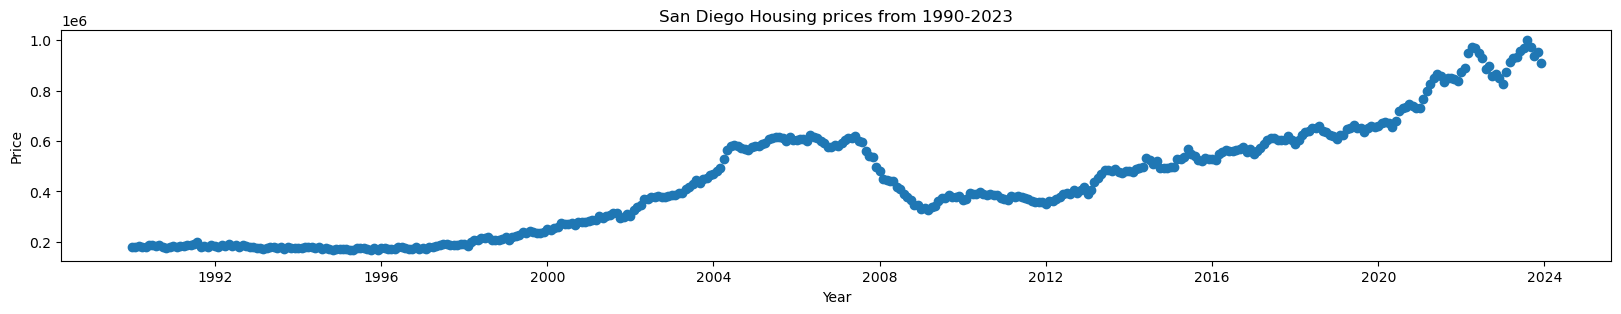

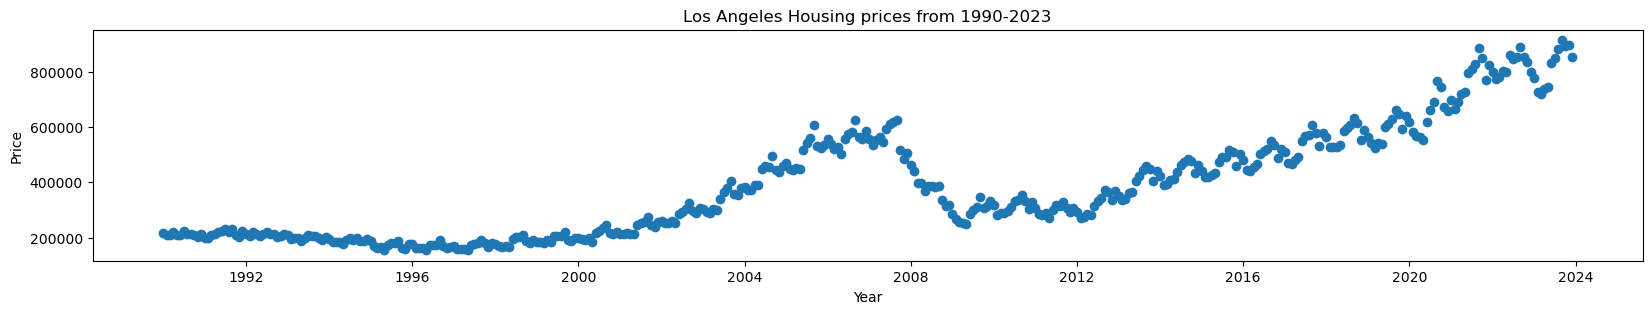

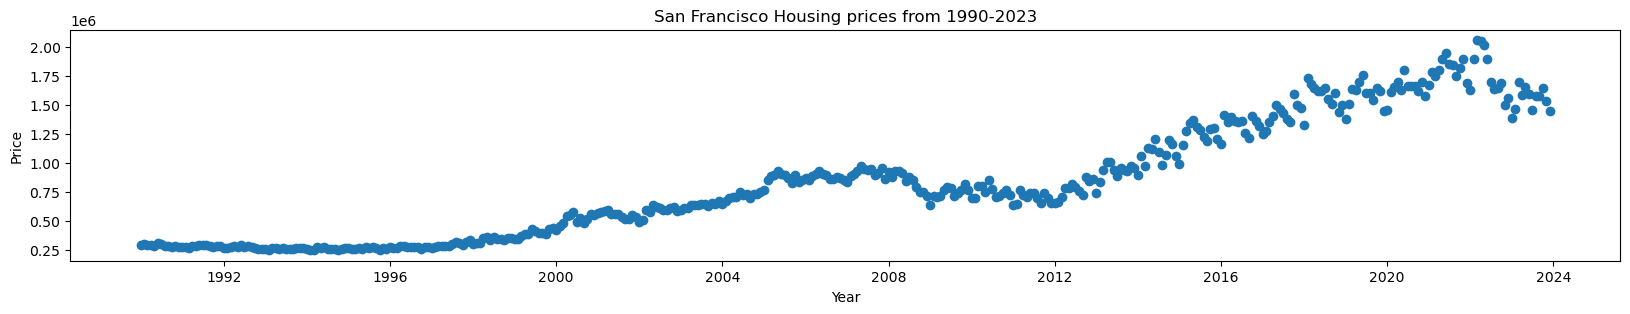

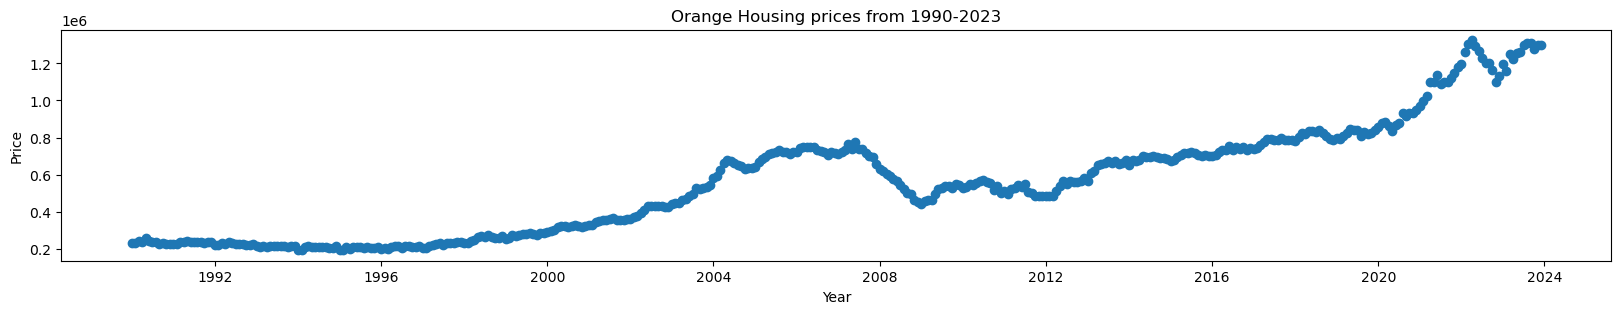

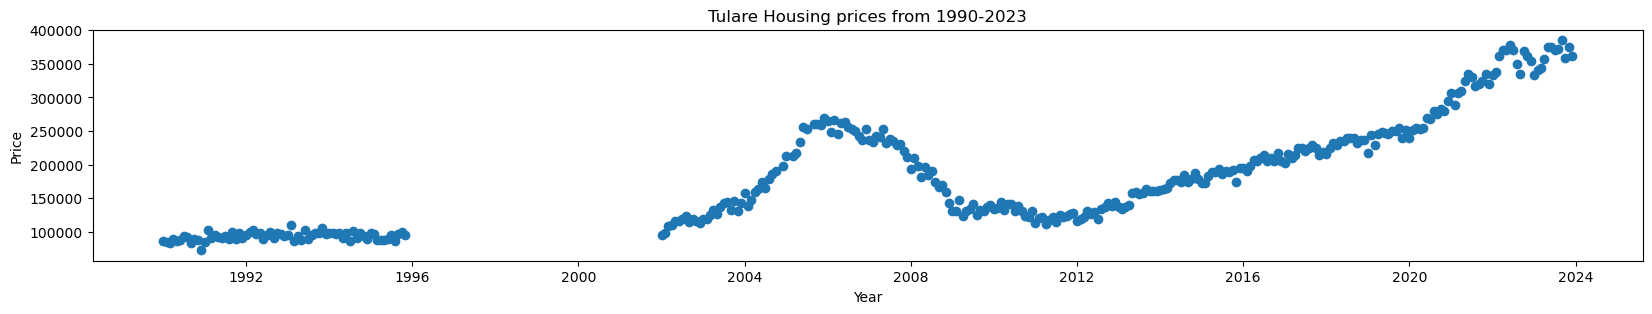

In [158]:
plt.rcParams["figure.figsize"] = (20,3)

for county in counties:
    plt.scatter(county_dfs[county]["Dates"], county_dfs[county][county])
    plt.title(f'{county} Housing prices from 1990-2023')
    plt.xlabel("Year")
    plt.ylabel("Price")
    plt.show()